# Завдання

- Отримати базові навички роботи в оточенні Google Colab.
- Розробити граф-дорогу, на основі якої буде виконано подальші
лабораторні роботи.

# Виконання

Імортування необхідних бібліотек:

- typing, copy та random необхідні для роботи графа;
- networkx та matplotlib для відображення самого графа.

In [169]:
from typing import List
from random import choice
from copy import deepcopy

import networkx as nx
import matplotlib.pyplot as plt

## Структура графу

Розмір графу - **n * n**

Кожна вершина має зв'язки із:

- вершиною, різниця індексів яких по модулю = **1**(крім _крайніх вершин_)
- вершиною, різниця індексів яких по модулю = **n**

Зв'язки представлені у вигляді масиву масивів, де елемент масиву містить **масив індексів вершин**, які приєднані до **індексу цього елементу**.


![title](https://raw.githubusercontent.com/mezgoodle/images/master/image_2022-09-26_16-17-06.png)

### Робота класу

- Конструктор:
  - double_n = дорівнює к-сті вершин;
  - n - розмірність графа або к-сть вершин на одній стороні;
  - edgesList - пустий список зв'язків між вершинами;
  - edges_n - к-сть ребер;
  - _create_edges - метод, що створює початкові ребра.
- _create_edges:
  1. Проходження подвійним циклом по к-сті вершин;
  2. Якщо різниця між номером **вершини-початком** та **вершиною-кінцем** дорівнює **одиниці** або **n**, то це додається у список зв'язків(номер початку є індексом батьківського масиву, а до масиву, що знаходиться по цьому індексу, додається номер кінця;
  3. Якщо різниця між вершинами дорівнює одиниці, але це є **крайні вершини**, то зв'язок не додається.
- delete_edges:
  - На початку є умова, яка перевіряє, щоб після видалення n-ої кількості ребер залишалась мінімальна для зв'язності графа;
  - Працює цикл **for** n разів, у якому є:
    - Цикл **while**, оскільки у мене видалаються ребра випадково, то якщо не пройшла перевірка на зв'язність після видалення, то потрібно знайти нове випадкове ребро;
    - Дві копії **edgesList**, з першої виконується видалення зв'язків, друга необхідна для того, щоб зберегти попередні значення, якщо не пройшла перевірка на зв'язність;
    - **edges** - додаткова змінна, яка створена для того, щоб пришвидшити процес видалення; можливо таке, що **choice** постійно буде видавати одне й те саме значення, а якщо вже таке було, то наступні операції не потрібно виконувати.
- _DFS та isStronglyConnected - це методи для перевірки зв'язності.
- draw:
  1. Створюється об'єкт класу **Graph** від бібліотеки **networkx**;
  2. До об'єкту додаються вершини(**node**) із номерами **counter**;
  3. Заповнюється словник позицій(**positions**) із координатами (Dict[**counter**,List[**j**, **i**]]);
  4. Зі списку зв'язків додаються ребра до об'єкту;
  5. Безпосереднє відображення графа.

In [170]:
class Graph:
    def __init__(self, n: int = 5):
        self.double_n = n * n
        self.n = n
        self.edgesList: List[list] = [[] for _ in range(self.double_n)]
        self.edges_n = 0
        self._create_edges()

    def _create_edges(self): 
        for start in range(self.double_n):
            for end in range(self.double_n):
                if abs(end - start) == self.n:
                    self.edgesList[start].append(end)
                    self.edges_n += 1
                if abs(end - start) == 1:
                    if (start % self.n == 0 and (end + 1) % self.n == 0) or (end % self.n == 0 and (start + 1) % self.n == 0):
                        continue
                    self.edgesList[start].append(end)
                    self.edges_n += 1

    def delete_edges(self, delete_n: int):
        if delete_n > self.edges_n / 2 + 1 - self.double_n:
            raise Exception(f'Delete number must be less or equal than {int(self.edges_n / 2 + 1 - self.double_n)}')
        for _ in range(delete_n):
            edges = []
            while True:
                temp_list = deepcopy(self.edgesList)
                edgesList_copy = deepcopy(self.edgesList)
                point = choice(range(len(temp_list)))
                connected_point = choice(temp_list[point])
                if [point, connected_point] in edges:
                  continue
                edges.append([point, connected_point])
                temp_list[point].remove(connected_point)
                temp_list[connected_point].remove(point)
                self.edgesList = temp_list
                if self.isStronglyConnected():
                    print(point, connected_point)
                    break
                self.edgesList = edgesList_copy
    
    def _DFS(self, v, visited):
        visited[v] = True
        for u in self.edgesList[v]:
            if not visited[u]:
                self._DFS(u, visited)

    def isStronglyConnected(self):
        for i in range(self.double_n):
            visited = [False] * self.double_n
            self._DFS(i, visited)
            for b in visited:
                if not b:
                    return False
        return True
    
    def draw(self):
      G=nx.Graph()
      positions = {}
      counter = 0
      for i in range(n-1, -1, -1):
        for j in range(n):
          G.add_node(counter)
          positions[counter] = (j, i)
          counter += 1
      for point, connections in enumerate(self.edgesList):
        for connection in connections:
          G.add_edge(point, connection)
      nx.draw(G, pos=positions, node_color='green', with_labels=True, font_weight='bold', font_color='white')

## Ініціалізація графу

In [171]:
n = 4

In [172]:
graph = Graph(n)

Кількість ребер

In [173]:
graph.edges_n

48

Список зв'язків

In [174]:
graph.edgesList

[[1, 4],
 [0, 2, 5],
 [1, 3, 6],
 [2, 7],
 [0, 5, 8],
 [1, 4, 6, 9],
 [2, 5, 7, 10],
 [3, 6, 11],
 [4, 9, 12],
 [5, 8, 10, 13],
 [6, 9, 11, 14],
 [7, 10, 15],
 [8, 13],
 [9, 12, 14],
 [10, 13, 15],
 [11, 14]]

Метод для перевірки на зв'язність

In [175]:
graph.isStronglyConnected()

True

## Відображення графу

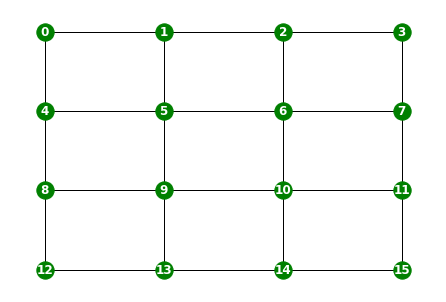

In [176]:
graph.draw()

## Видалення ребер

In [177]:
graph.delete_edges(9)

11 7
7 3
10 14
4 0
2 6
10 6
13 9
8 4
9 10


In [178]:
graph.edgesList

[[1],
 [0, 2, 5],
 [1, 3],
 [2],
 [5],
 [1, 4, 6, 9],
 [5, 7],
 [6],
 [9, 12],
 [5, 8],
 [11],
 [10, 15],
 [8, 13],
 [12, 14],
 [13, 15],
 [11, 14]]

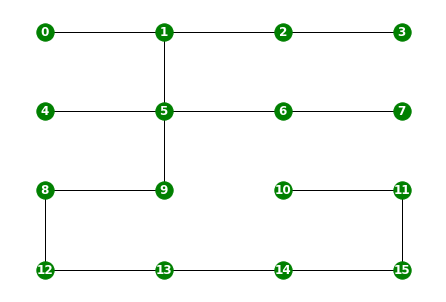

In [179]:
graph.draw() 